In [17]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [2]:
def tokenize(text):
    text = str(text)
    tokens = TweetTokenizer().tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha() and token not in set(stopwords.words("english"))]
    return tokens

In [3]:
df = pd.read_csv("all_posts.csv")
df["tokenized_selftext"] = df["selftext"].apply(tokenize)
df.head()

id subreddit_id   created_utc  \
0  1gvppym     t5_2qirg  1.732110e+09   
1   xi7em6     t5_2qirg  1.663581e+09   
2   junrt7     t5_2qirg  1.605455e+09   
3   hdnt0e     t5_2qirg  1.592812e+09   
4   n5fucd     t5_2qirg  1.620221e+09   

                                               title  \
0                                      I killed her.   
1  6 months ago I posted on this subreddit beggin...   
2  As a rape survivor, I want to let you know tha...   
3  I tried so hard to love this country, but afte...   
4  Best friend took her own life: the aftermath a...   

                                            selftext     ups  downs  \
0  good morning today transgender day remembrance...  1011.0    0.0   
1  long road recovery tried kill get bed three mo...   683.0    0.0   
2  although still struggle raped nearly half year...   626.0    0.0   
3  norp india native norp family born gpe born gp...   444.0    0.0   
4  november best friend committed suicide honestl...   437.0    0.0   

                                  tokenized_selftext  
0  [good, morning, today, transgender, day, remem...  
1  [long, road, recovery, tried, kill, get, bed, ...  
2  [although, still, struggle, raped, nearly, hal...  
3  [norp, india, native, norp, family, born, gpe,...  
4  [november, best, friend, committed, suicide, h...

In [29]:
tagged_data = [TaggedDocument(words=row, tags=[str(i)]) for i, row in enumerate(df["tokenized_selftext"])]

print(tagged_data[0])

# doc2vec_model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=40)
# doc2vec_model.build_vocab(tagged_data)
# doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

TaggedDocument<['good', 'morning', 'today', 'transgender', 'day', 'remembrance', 'years', 'ago', 'used', 'privilege', 'passing', 'rich', 'trans', 'women', 'give', 'back', 'gave', 'speeches', 'helped', 'change', 'laws', 'got', 'university', 'one', 'lgbt', 'friendly', 'campuses', 'roll', 'years', 'one', 'day', 'grocery', 'store', 'parking', 'lot', 'women', 'stopped', 'told', 'speeches', 'following', 'story', 'said', 'got', 'courage', 'transition', 'talked', 'little', 'bit', 'went', 'separate', 'ways', 'ended', 'killed', 'family', 'found', 'transgender', 'day', 'remembrance', 'told', 'many', 'times', 'death', 'fault', 'blame', 'self', 'gave', 'false', 'sense', 'security', 'life', 'gone', 'learned', 'stopped', 'activism', 'hid', 'life', 'political', 'climate', 'asked', 'share', 'story', 'keep', 'thinking', 'person', 'think'], ['0']>


In [8]:
doc_embeddings = [doc2vec_model.dv[str(i)] for i in range(len(tagged_data))]

[array([ 0.26704365, -0.47407818,  0.22253789,  0.5464202 ,  0.13049246,
       -0.37287185, -0.86187506, -0.19334663,  2.1614382 , -1.0819483 ,
        0.11174207,  0.45783523, -0.4323515 ,  0.22657649,  0.8975955 ,
       -1.2192218 ,  0.9218897 , -1.5732393 , -0.78009886,  0.39348415,
        1.0212235 , -0.95574135, -0.08543504,  1.4443734 ,  0.06891289,
       -0.03512906,  0.86130583,  1.0440149 , -0.01845273, -0.7216782 ,
        1.2699834 ,  1.7239962 , -1.2144305 ,  0.6997126 ,  0.68963397,
       -0.71772254, -0.3850486 ,  0.8266638 , -1.6156768 ,  0.02773626,
        2.9659593 , -0.06805998,  0.7021066 ,  1.2061281 , -0.24848539,
        1.8612857 , -1.0748317 ,  0.0875603 ,  0.57189935,  0.70873374],
      dtype=float32), array([-0.7258362 ,  0.23260225, -0.15802336, -0.9132918 , -0.25573102,
       -0.47406018,  0.63077253,  0.21422577,  1.1565437 ,  0.3338055 ,
       -0.16269074,  1.184246  , -0.45172366, -0.13815983,  0.3819159 ,
        0.44782773, -0.10083417, -0.1141

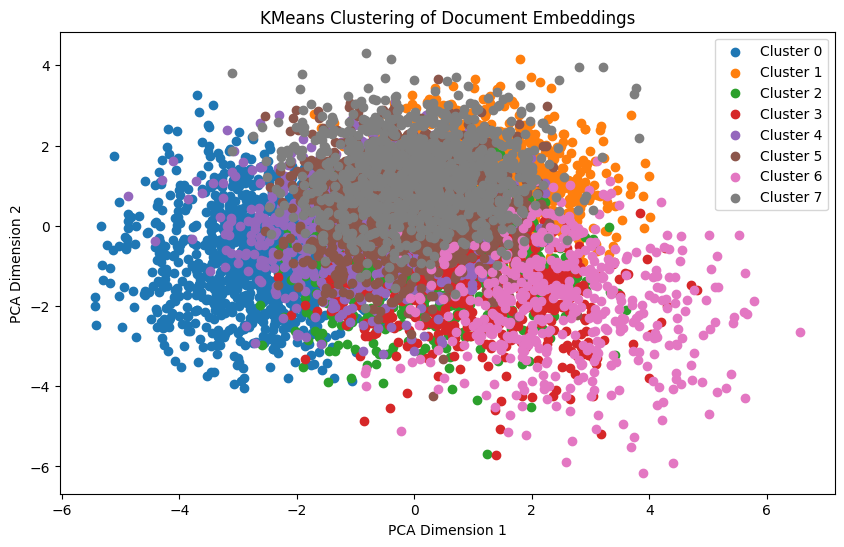

In [26]:
num_clusters = 8 
kmeans = KMeans(n_clusters=num_clusters)
df['cluster'] = kmeans.fit_predict(doc_embeddings)

# Step 6: (Optional) Visualizing the clusters using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(doc_embeddings)

plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_points = reduced_embeddings[df['cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")

plt.legend()
plt.title("KMeans Clustering of Document Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()